#### Import Libraries

In [5]:
!pip3 install seaborn

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Exploratory Data Analysis

In [7]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
df = pd.read_csv(URL)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


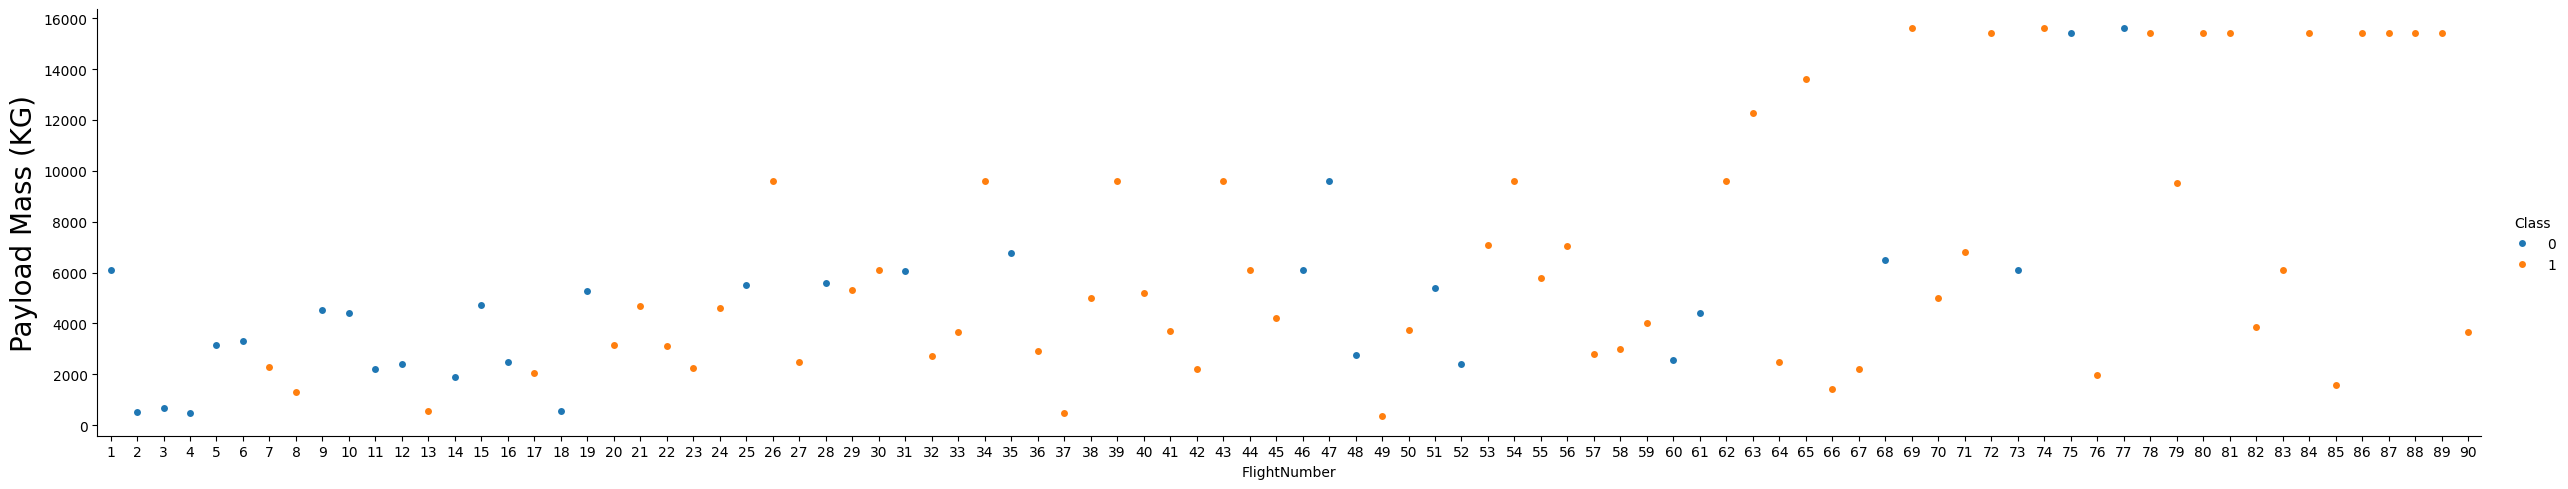

In [8]:
# We can plot out the FlightNumber vs. PayloadMassand overlay the outcome of the launch.
# We see that as the flight number increases, the first stage is more likely to land successfully.

sns.catplot(x = "FlightNumber", y = "PayloadMass", data = df, hue = "Class", aspect = 5)
plt.xlabel("FlightNumber")
plt.ylabel("Payload Mass (KG)", fontsize = 20)
plt.show()

#### TASK 1: Visualize the relationship between Flight Number and Launch Site

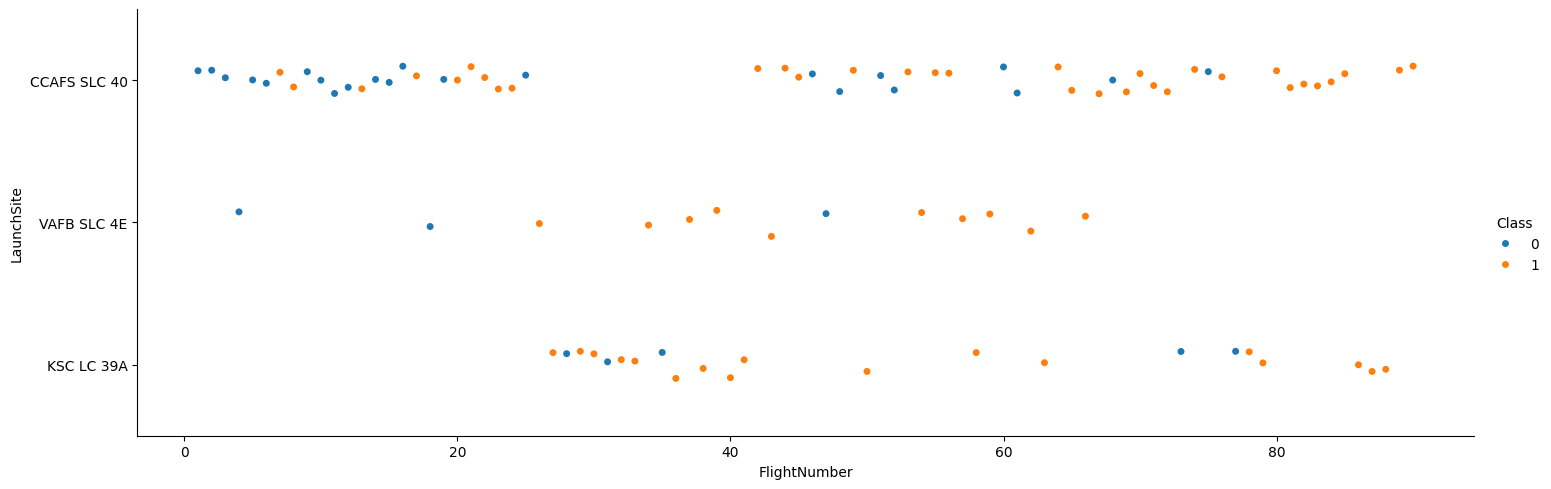

In [9]:
sns.catplot(x = "FlightNumber", y = "LaunchSite", data = df, hue = "Class", aspect = 3)
plt.xlabel("FlightNumber", fontsize = 10)
plt.ylabel("LaunchSite", fontsize = 10)
plt.show()

#### TASK 2: Visualize the relationship between Payload Mass and Launch Site

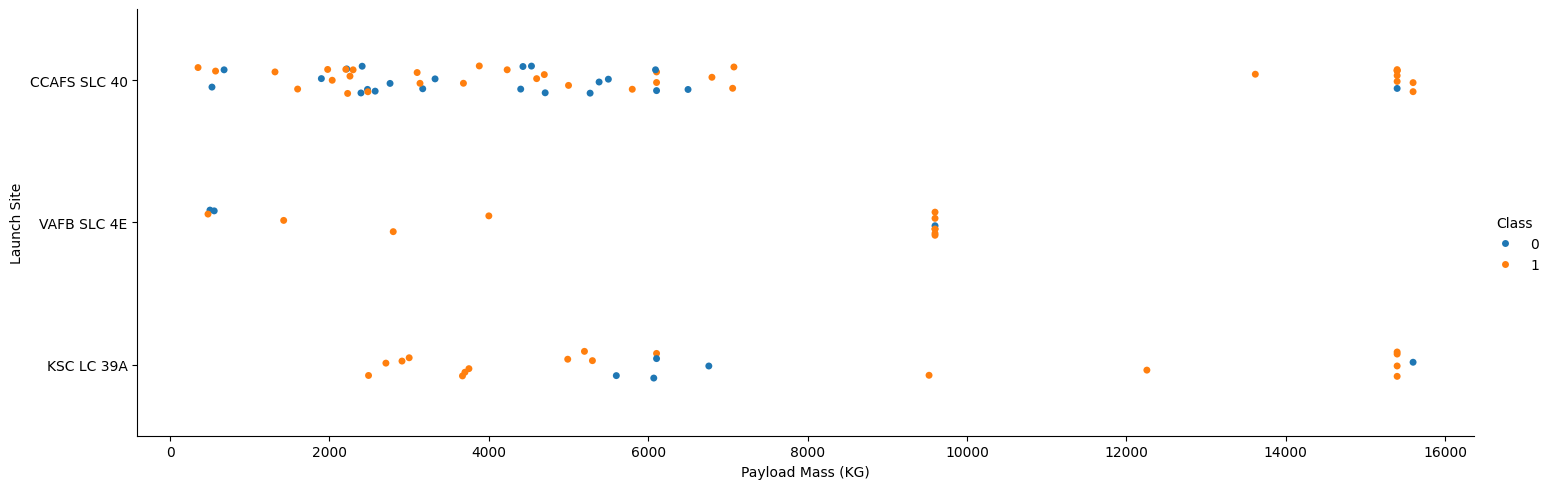

In [10]:
sns.catplot(x = "PayloadMass", y = "LaunchSite", data = df, hue = "Class", aspect = 3)
plt.xlabel("Payload Mass (KG)", fontsize = 10)
plt.ylabel("Launch Site", fontsize = 10)
plt.show()

#### TASK 3: Visualize the relationship between success rate of each orbit type

In [11]:
# use groupby method on Orbit column and get the mean of Class column
success_rate = df.groupby('Orbit')['Class'].mean().reset_index()
print(success_rate)

    Orbit     Class
0   ES-L1  1.000000
1     GEO  1.000000
2     GTO  0.518519
3     HEO  1.000000
4     ISS  0.619048
5     LEO  0.714286
6     MEO  0.666667
7      PO  0.666667
8      SO  0.000000
9     SSO  1.000000
10   VLEO  0.857143


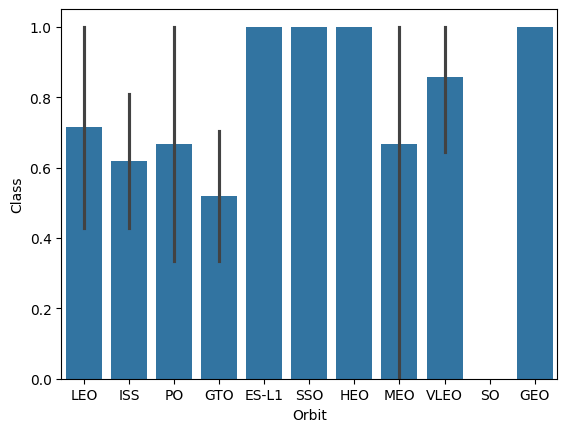

In [12]:
sns.barplot(x = 'Orbit', y = "Class", data = df)
plt.xlabel("Orbit")
plt.ylabel("Class")
plt.show()

#### TASK 4: Visualize the relationship between FlightNumber and Orbit type

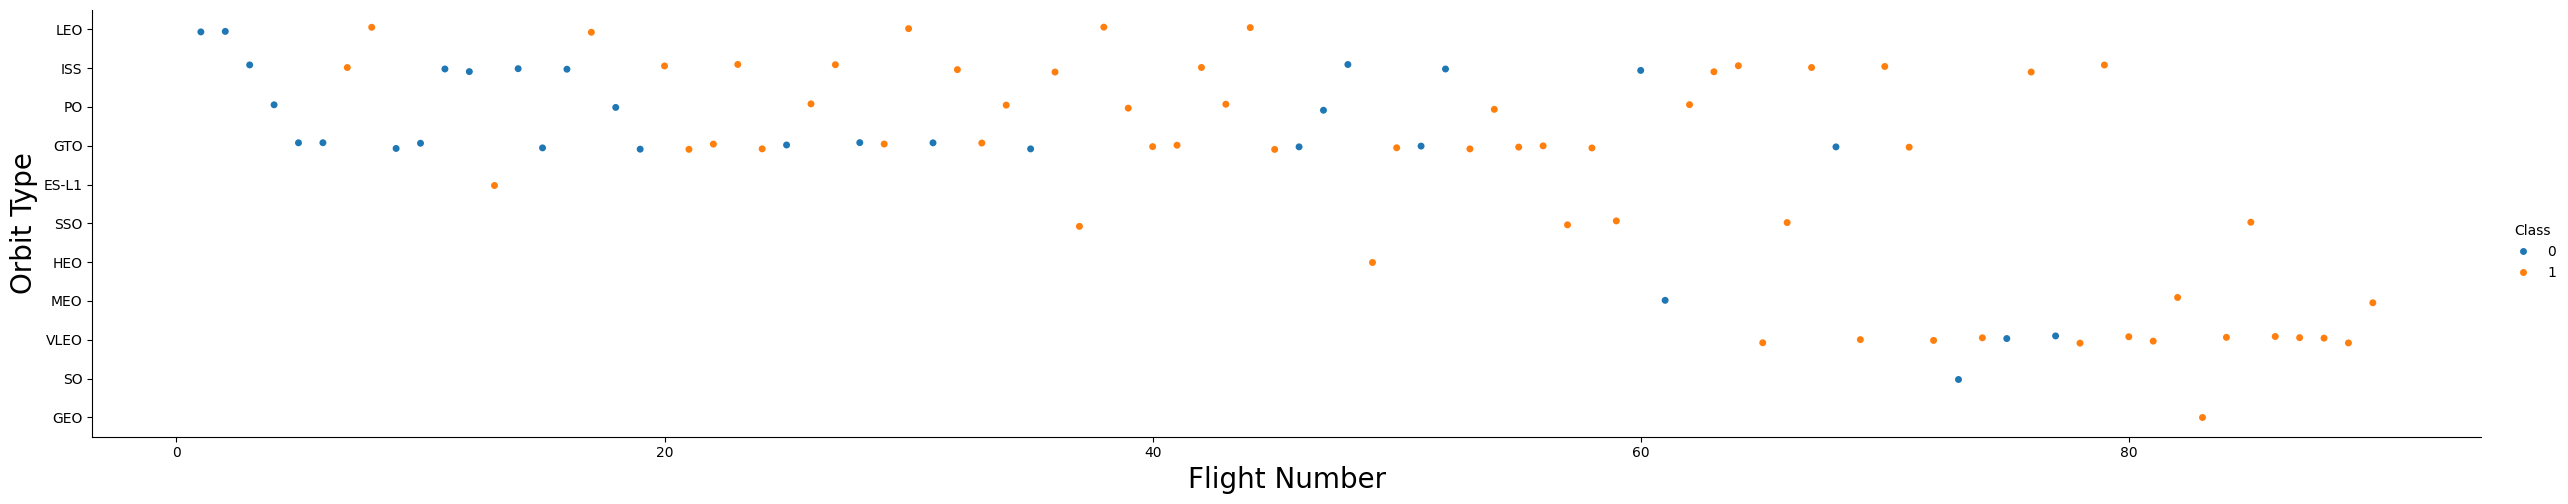

In [13]:
sns.catplot(x = "FlightNumber", y = "Orbit", data = df, hue = "Class", aspect = 5)
plt.xlabel("Flight Number", fontsize = 20)
plt.ylabel("Orbit Type", fontsize = 20)
plt.show()

#### TASK 5: Visualize the relationship between Payload Mass and Orbit type

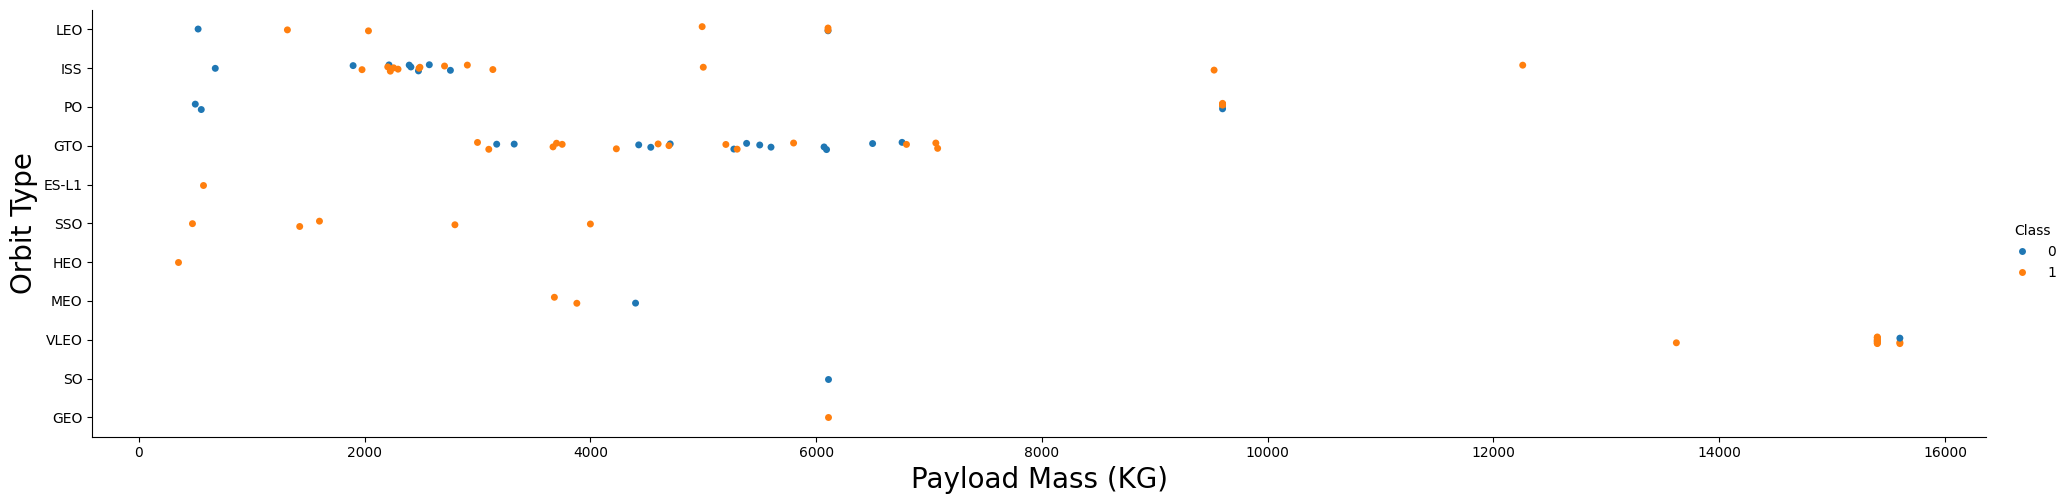

In [14]:
sns.catplot(x = "PayloadMass", y = "Orbit", data = df, hue = "Class", aspect = 4)
plt.xlabel("Payload Mass (KG)", fontsize = 20)
plt.ylabel("Orbit Type", fontsize = 20)
plt.show()

#### TASK 6: Visualize the launch success yearly trend

In [15]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


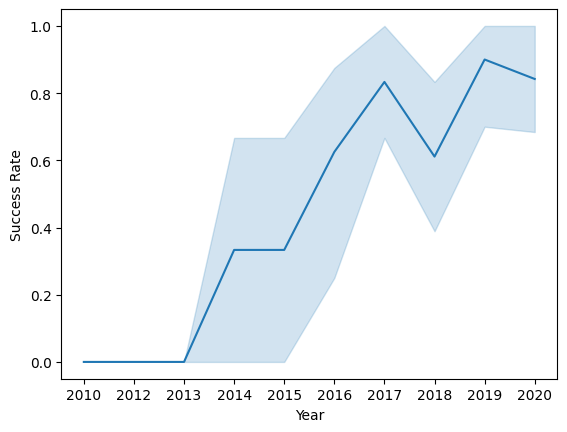

In [16]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate

sns.lineplot(x = "Date", y = "Class", data = df)
plt.xlabel("Year", fontsize = 10)
plt.ylabel("Success Rate",fontsize = 10)
plt.show()

#### Features Engineering

In [17]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


#### TASK 7: Create dummy variables to categorical columns

In [18]:
features_one_hot = pd.get_dummies(features, columns = ["Orbit","LaunchSite","LandingPad","Serial"])
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


#### TASK 8: Cast all numeric columns to float64

In [19]:
# HINT: use astype function
features_one_hot.astype('float64')

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6104.959412,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,1.0,1.0,1.0,5.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
86,87.0,15400.000000,3.0,1.0,1.0,1.0,5.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
87,88.0,15400.000000,6.0,1.0,1.0,1.0,5.0,5.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
88,89.0,15400.000000,3.0,1.0,1.0,1.0,5.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [20]:
features_one_hot.to_csv('dataset_part_3.csv', index = False)